In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [2]:
with open("../data/raf.txt", 'r') as text:
    textfile = text.read()
#     print(textfile)

In [3]:
type(textfile)

str

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(textfile)

In [5]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 2944 samples and 10531 outcomes>


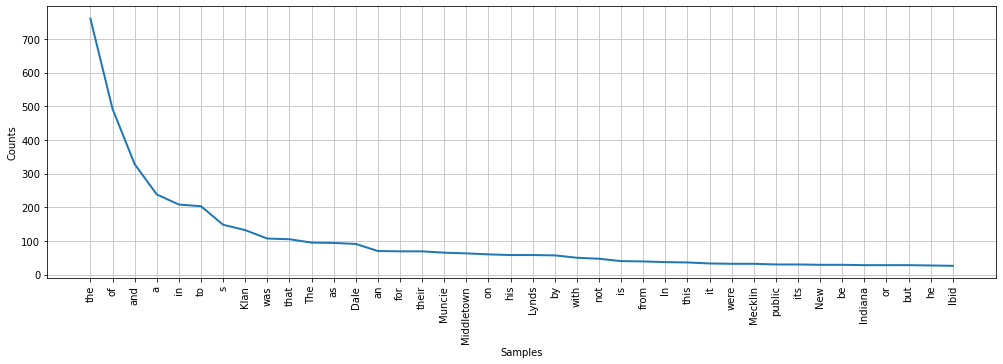

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [7]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'shan', 'hadn', 'couldn', 'few', 'under', 'was', 'theirs', 'some', 'those', 'through', 'my', "shan't", 'having', 'no', 'isn', 't', 'all', "you've", 'himself', 'and', 'don', 'this', "should've", 'mustn', 'whom', 'been', 'both', 'than', "aren't", 'about', "mustn't", 'myself', 'each', 'didn', 'doing', 'while', 'its', 'ours', 'be', 'of', 'on', 'again', 'does', 'before', 'do', 'too', 'during', 'at', 'am', 'why', "mightn't", 'after', 'ourselves', 'being', 'as', 'ain', 'mightn', 'but', 've', 'has', 'yourself', 'i', "needn't", 'over', 'above', 'can', 'so', 'more', 'further', 'such', 'yours', 'into', 'nor', 'once', 'same', "shouldn't", "you'll", "you'd", 'because', 'hers', 'an', 'weren', 'doesn', 'haven', 'herself', 'them', 'own', 'very', "isn't", 'if', "couldn't", 's', 'hasn', 'out', 'they', 'where', 'aren', "hadn't", 'm', "weren't", 'we', 'me', 'these', 'up', 'against', 'needn', 'below', 'your', 'in', 'wasn', 'his', 'now', "hasn't", 'you', "she's", 'ma', 'll', 'the', 're', 'o', 'have', 'he',

In [42]:
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'In', 'in', 'The', 'the', 'Ibid']

stop_words = stopwords.words('english')

stop_words += list(string.punctuation)

stop_words += additional_stopwords

In [43]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [44]:
print(len(tokenized_review))
print(len(filtered_review))

10531
6312


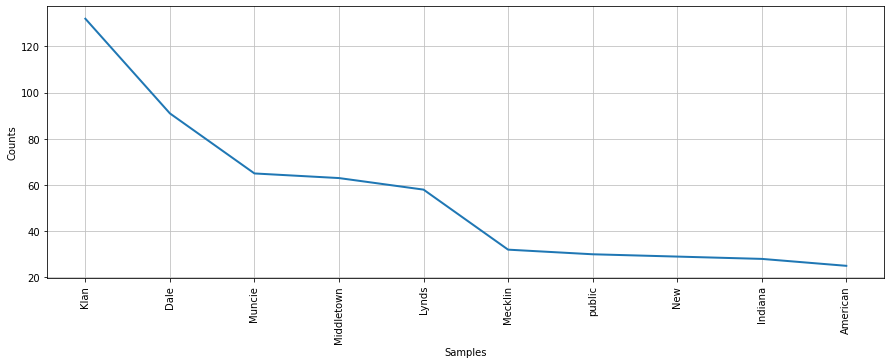

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(10)

In [75]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer(stop_words=None)
X = vec.fit_transform([textfile])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,00,000,10,100,103,104,106,107,109,11,...,yields,york,yorker,you,young,your,youths,zeitgeist,œcommon,œcompact
0,1,3,4,2,1,2,1,2,1,5,...,1,23,2,1,4,1,1,1,1,1


In [76]:
df.index

RangeIndex(start=0, stop=1, step=1)

In [77]:
df.columns

Index(['00', '000', '10', '100', '103', '104', '106', '107', '109', '11',
       '113', '116', '12', '120', '124', '13', '14', '15', '151', '152', '155',
       '16', '166', '167', '17', '18', '180', '182', '183', '1867', '188',
       '1886', '1890', '1895', '1899', '19', '1909', '1914', '1915', '1920',
       '1920s', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1932', '1933', '1936', '1947', '1954', '1955',
       '1960s', '1963', '1965', '1967', '1991', '20', '2003', '2004', '2010',
       '2011', '2015', '2016', '2017', '2018', '21', '210', '22', '221', '23',
       '24', '25', '26', '27', '28', '29', '291', '30', '31', '315', '32',
       '33', '34', '35', '358', '36', '364', '366', '37', '38', '381', '39',
       '40', '400', '41', '414', '415', '42', '421', '43', '434', '44', '45',
       '46', '47', '471', '472', '475', '476', '477', '478', '48', '485', '49',
       '50', '500', '51', '52', '53', '532', '54', '55', '56', '57',

In [78]:
# df1 = df.stack()

In [52]:
# df.unstack()

In [61]:
pd.options.display.max_seq_items = None
# df.columns

In [79]:
df = df.transpose()

In [80]:
df.head()

,0
00,1
000,3
10,4
100,2
103,1


In [89]:
df = df.reset_index()

In [73]:
# df.rename(columns={'index':'word'})

In [90]:
df.columns

Index(['index', 0], dtype='object')

In [91]:
df['index']

0              00
1             000
2              10
3             100
4             103
          ...    
2779         your
2780       youths
2781    zeitgeist
2782      œcommon
2783     œcompact
Name: index, Length: 2784, dtype: object

In [96]:
df_g = df.groupby(['index']).nunique()

In [100]:
df_g.reset_index()

,index,0
0,00,1
1,000,1
2,10,1
3,100,1
4,103,1
...,...,...
2779,your,1
2780,youths,1
2781,zeitgeist,1
2782,œcommon,1


In [101]:
df_g[df_g[0] > 2]

,0
index,
